In [1]:
library(sf)
library(dplyr)
library(ggplot2)
library(stringr)
library(RColorBrewer)

ERROR: Error in library(sf): there is no package called ‘sf’


In [ ]:
install.packages("sf")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’




In [ ]:
setwd("/content/drive/MyDrive/AAFT_Draft/Data")

In [ ]:
profiles <- read.csv('profilesCleaned.csv')
posts <- read.csv("postsCleaned.csv")

Warning message in file(file, "rt"):
“cannot open file 'profilesCleaned.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
distribute <- function(data, filename){

df <- data %>%
  group_by(loc) %>%
  summarise(user_count = n()) %>%
  arrange(desc(user_count))

df$loc <- sapply(strsplit(as.character(df$loc), " "), `[`, 1)

dist <- df %>%
  group_by(loc) %>%
  mutate(loc = sub(" .*", "", loc)) %>%
  summarise(user_count = sum(user_count)) %>%
  ungroup() %>%
  arrange(desc(user_count))

write.csv(dist, filename, row.names = F)

return(dist)
}

In [ ]:
distribute(profiles, "profilesDistribution.csv")

In [ ]:
distribute(posts, "postsDistribution.csv")

In [ ]:
dat <- read.csv("profilesDistribution.csv")

In [ ]:
map <- st_read("Misc/gadm41_CHN.gpkg", layer = "ADM_ADM_3")

Reading layer `ADM_ADM_3' from data source 
  `/content/drive/MyDrive/AAFT_Draft/Data/Misc/gadm41_CHN.gpkg' 
  using driver `GPKG'
Simple feature collection with 2421 features and 16 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 73.5577 ymin: 18.15931 xmax: 134.7739 ymax: 53.56086
Geodetic CRS:  WGS 84


In [ ]:
# 对应替换
replacements <- c(
  "黔西南布依族苗族自治州" = "黔西南州",
  "黔东南苗族侗族自治州" = "黔东南州",
  "黔南布依族苗族自治州" = "黔南州",
  "临夏回族自治州" = "临夏州",
  "湘西土家族苗族自治州" = "湘西州",
  "伊犁哈萨克自治州" = "伊犁州",
  "甘南藏族自治州" = "甘南州",
  "大理白族自治州" = "大理州",
  "德宏傣族景颇族自治州" = "德宏州",
  "红河哈尼族彝族自治州" = "红河州",
  "文山壮族苗族自治州" = "文山州",
  "西双版纳傣族自治州" = "西双版纳州",
  "凉山彝族自治州" = "凉山州",
  "楚雄彝族自治州" = "楚雄州",
  "怒江傈僳族自治州" = "怒江州",
  "迪庆藏族自治州" = "迪庆州",
  "阿坝藏族羌族自治州" = "阿坝州",
  "甘孜藏族自治州" = "甘孜州",
  "果洛藏族自治州" = "果洛州",
  "海南藏族自治州" = "海南州",
  "黄南藏族自治州" = "黄南州",
  "海北藏族自治州" = "海北州",
  "海东地区" = "海东市",
  "海西蒙古族藏族自治州" = "海西州",
  "玉树藏族自治州" = "玉树州",
  "阿勒泰地区" = "阿勒泰地区",
  "阿克苏地区" = "阿克苏地区",
  "和田地区" = "和田地区",
  "喀什地区" = "喀什地区",
  # "克孜勒苏柯尔克孜自治州" = "克孜勒苏州",
  "昌吉回族自治州" = "昌吉州",
  "博尔塔拉蒙古自治州" = "博尔塔拉州",
  "巴音郭愣蒙古自治州" = "巴音郭楞州",
  "塔城地区" = "塔城地区",
  "伊犁哈萨克自治州" = "伊犁州",
  "延边朝鲜族自治州" = "延边州",
  "恩施土家族苗族自治州" = "恩施州"
)

In [ ]:
# make city-level map
map <- map %>%
  mutate(NL_NAME_2 = sub(".*\\|", "", NL_NAME_2)) %>%
  filter(!is.na(map$NL_NAME_2))

for (pattern in names(replacements)) {
  replacement <- replacements[[pattern]]
  map$NL_NAME_2 <- gsub(pattern, replacement, map$NL_NAME_2)
}

map <- map %>%
  mutate(NL_NAME_2 = as.character(NL_NAME_2)) %>%
  left_join(dat, by = c("NL_NAME_2" = "loc"))

In [ ]:
# Apply the transformation
extract <- map %>%
  select(NAME_1, NAME_2, user_count) %>%
  filter(!is.na(user_count)) %>%
  group_by(NAME_1) %>%
  summarize(user = sum(user_count)) %>%
  ungroup() %>%
  st_drop_geometry

In [ ]:
write.csv(extract, "toProvince.csv", row.names = F)

In [ ]:
mapP <- st_read("Misc/gadm41_CHN.gpkg", layer = "ADM_ADM_1")
datP <- read.csv("toProvince.csv")

In [ ]:
mapP <- mapP %>%
  left_join(datP, by = c("NAME_1" = "NAME_1"))

In [ ]:
ggplot(data = mapP) +
  geom_sf(aes(fill = user), color = "NA") +
  scale_fill_viridis_c(option = "viridis") +
  labs(title = "User Number by Province in Mainland China", fill = "User Number") +
  theme(
    axis.title = element_blank(),
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    panel.background = element_blank(),
    plot.title = element_text(hjust = 0.5)
  )

In [ ]:
ggplot(data = map) +
  geom_sf(aes(fill = user_count), color = "NA") +
  scale_fill_viridis_c(option = "viridis") +
  labs(title = "User Number by City in Mainland China", fill = "User Number") +
  theme(
    axis.title = element_blank(),
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    panel.background = element_blank(),
    plot.title = element_text(hjust = 0.5)
  )

In [ ]:
# mapping posts

library(sf)
library(dplyr)
library(ggplot2)
library(stringr)
library(RColorBrewer)

setwd("/content/drive/MyDrive/AAFT_Draft/Data")
dat <- read.csv("postsDistribution.csv")

In [ ]:
map <- st_read("Misc/gadm41_CHN.gpkg", layer = "ADM_ADM_1")

map <- map %>%
  mutate(NL_NAME_1 = sub(".*\\|", "", NL_NAME_1)) %>%
  filter(!is.na(map$NL_NAME_1))

Reading layer `ADM_ADM_1' from data source 
  `/content/drive/MyDrive/AAFT_Draft/Data/Misc/gadm41_CHN.gpkg' 
  using driver `GPKG'
Simple feature collection with 37 features and 11 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 73.5577 ymin: 18.15931 xmax: 134.7739 ymax: 53.56086
Geodetic CRS:  WGS 84


In [ ]:
# unique(map$NL_NAME_1)
map$NL_NAME_1 <- map$NL_NAME_1 %>%
  gsub("广西壮族自治区", "广西",.) %>%
  gsub("黑龍江省", "黑龙江",.) %>%
  gsub("内蒙古自治区", "内蒙古",.) %>%
  gsub("宁夏回族自治区", "宁夏",.) %>%
  gsub("新疆维吾尔自治区", "新疆",.) %>%
  gsub("西藏自治区", "西藏",.)


In [ ]:
map <- map %>%
  left_join(dat, by = c("NL_NAME_1" = "loc"))

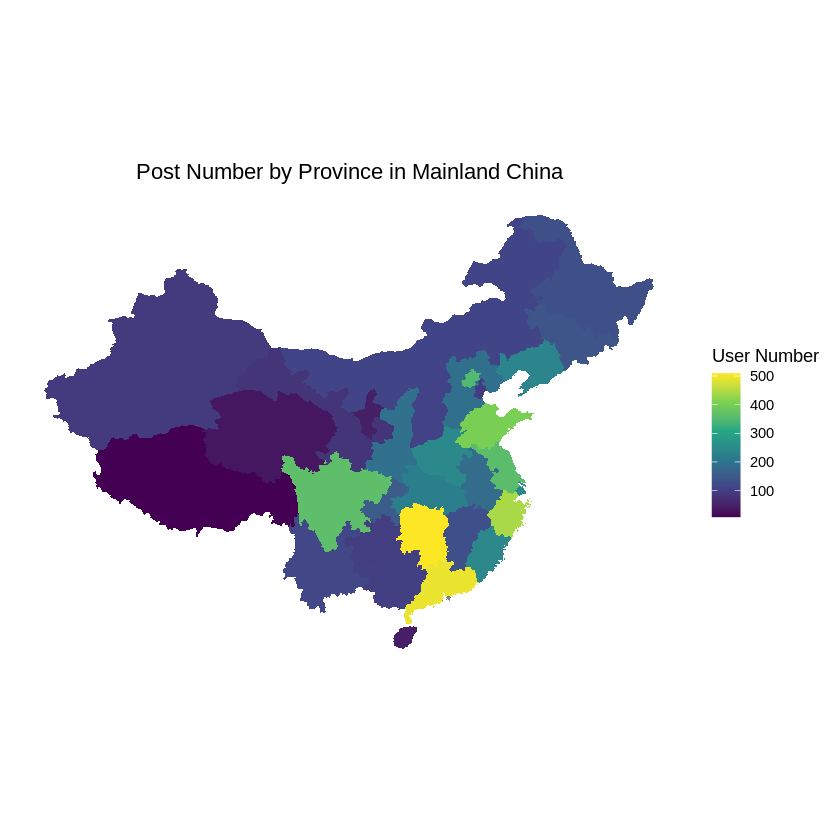

In [ ]:
ggplot(data = map) +
  geom_sf(aes(fill = user_count), color = "NA") +
  scale_fill_viridis_c(option = "viridis") +
  labs(title = "Post Number by Province in Mainland China", fill = "User Number") +
  theme(
    axis.title = element_blank(),
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    panel.background = element_blank(),
    plot.title = element_text(hjust = 0.5)
  )